# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Joanne Landy Tantreece
- **Email:** joannelthy@gmail.com
- **ID Dicoding:** -

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penyewaan sepeda berubah seiring waktu?
- Bagaimana pengaruh faktor waktu (jam) terhadap penyewaan?
- Bagaimana pengaruh kondisi musim terhadap penyewaan?
- Bagaimana pengaruh kelembapan terhadap penyewaan?
- Apakah terdapat perbedaan pola penyewaan antara weekdays dan weekend?

## Import Semua Packages/Library yang Digunakan

In [1]:
# import library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# load day table
day_df = pd.read_csv("Bike-sharing-dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# load hour table
hour_df = pd.read_csv("Bike-sharing-dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
# check data type in day_df & hour_df
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

### Assessing Data

In [5]:
# check statistic parameter in day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [6]:
# check statistic parameter in hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [7]:
# check missing value in day_df
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# check missing value in hour_df
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
# check duplicates in day_df
print("Data duplicates in day_df: ", day_df.duplicated().sum())
print("Data duplicates in hour_df: ", hour_df.duplicated().sum())

Data duplicates in day_df:  0
Data duplicates in hour_df:  0


**Insight:**
- Mengetahui jumlah baris dan kolom, tipe data masing-masing kolom, serta adanya nilai yang hilang atau tidak konsisten.
- Memahami rentang waktu data dan distribusi awal nilai-nilai numerik yang tersedia.

### Cleaning Data

In [10]:
# merge data

# make a subset from day_df with dteday & cnt
day_subset = day_df[['dteday', 'cnt']].copy()

# change 'cnt' to 'daily_cnt' so it's not conflicted with cnt in hour_df
day_subset.rename(columns={'cnt': 'daily_cnt'}, inplace=True)

# merge hour_df with day_subset by 'dteday'
merged_df = pd.merge(hour_df, day_subset, on='dteday', how='left')

# save merged data
merged_df.to_csv('Bike-sharing-dataset/merged.csv', index=False)

# show merged data
print("Data hasil merge:")
print(merged_df.head())

Data hasil merge:
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  \
0           1  0.24  0.2879  0.81        0.0       3          13   16   
1           1  0.22  0.2727  0.80        0.0       8          32   40   
2           1  0.22  0.2727  0.80        0.0       5          27   32   
3           1  0.24  0.2879  0.75        0.0       3          10   13   
4           1  0.24  0.2879  0.75        0.0       0           1    1   

   daily_cnt  
0        985  
1        985  
2        985  
3        985  

In [11]:
# make the normalized value into its normal scale
merged_df['temp'] = merged_df['temp'] * 41
merged_df['atemp'] = merged_df['atemp'] * 50
merged_df['hum'] = merged_df['hum'] * 100
merged_df['windspeed'] = merged_df['windspeed'] * 67

In [12]:
# convert the categorical value into descriptive label

# convert season (1:Spring, 2:Summer, 3:Fall, 4:Winter)
merged_df['season'] = merged_df['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

# convert mnth (1:Jan, 2:Feb, ..., 12:Dec)
merged_df['mnth'] = merged_df['mnth'].replace({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

# convert weathersit (1-4)
merged_df['weathersit'] = merged_df['weathersit'].replace({
    1: 'Clear', 2: 'Misty', 3: 'Light_rainsnow', 4: 'Heavy_rainsnow'
})

# convert weekday (numbers to name of days)
merged_df['weekday'] = merged_df['weekday'].replace({
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 
    4: 'Thursday', 5: 'Friday', 6: 'Saturday'
})

# convert yr (0:2011, 1:2012)
merged_df['yr'] = merged_df['yr'].replace({0: '2011', 1: '2012'})

In [13]:
merged_df['hum'] = pd.to_numeric(merged_df['hum'], errors='coerce')

In [14]:
# make  category_days: mengklasifikasikan hari sebagai weekend atau weekdays
def get_category_days(day_name):
    if day_name in ['Saturday', 'Sunday']:
        return 'weekend'
    else:
        return 'weekdays'

merged_df['category_days'] = merged_df['weekday'].apply(get_category_days)

# Fungsi untuk mengklasifikasi kelembapan
def classify_humidity(hum):
    if hum < 45:
        return "Terlalu kering"
    elif 45 <= hum < 65:
        return "Ideal"
    else:
        return "Terlalu Lembab"

merged_df['humidity_category'] = merged_df['hum'].apply(classify_humidity)

In [15]:
# rename columns
merged_df.rename(columns={
    "dteday": "dateday",
    "yr": "year",
    "hr": "hour",
    "mnth": "month",
    "weathersit": "weather_category",
    "hum": "humidity",
    "cnt": "hourly_count"  # cnt from hour.csv (total rents per hour)
}, inplace=True)

In [16]:
# delete column: 'workingday'
merged_df.drop(columns=['instant', 'workingday'], errors='ignore', inplace=True)

In [29]:
# convert 'dateday' to datetime type
merged_df['dateday'] = pd.to_datetime(merged_df['dateday'], errors='coerce')

print("Kolom 'dateday' telah dikonversi ke tipe:", merged_df['dateday'].dtype)

Kolom 'dateday' telah dikonversi ke tipe: datetime64[ns]


In [36]:
# check again if the data already ready to use for EDA
merged_df = pd.read_csv('Bike-sharing-dataset/clean_merged.csv')
print(merged_df.head())

      dateday  season  year month  hour  holiday   weekday weather_category  \
0  2011-01-01  Spring  2011   Jan     0        0  Saturday            Clear   
1  2011-01-01  Spring  2011   Jan     1        0  Saturday            Clear   
2  2011-01-01  Spring  2011   Jan     2        0  Saturday            Clear   
3  2011-01-01  Spring  2011   Jan     3        0  Saturday            Clear   
4  2011-01-01  Spring  2011   Jan     4        0  Saturday            Clear   

   temp   atemp  humidity  windspeed  casual  registered  hourly_count  \
0  9.84  14.395      81.0        0.0       3          13            16   
1  9.02  13.635      80.0        0.0       8          32            40   
2  9.02  13.635      80.0        0.0       5          27            32   
3  9.84  14.395      75.0        0.0       3          10            13   
4  9.84  14.395      75.0        0.0       0           1             1   

   daily_cnt category_days humidity_category  temp_category  
0        985      

In [37]:
merged_df.to_csv('Bike-sharing-dataset/clean_merged.csv', index=False)

In [39]:
df = pd.read_csv('Bike-sharing-dataset/clean_merged.csv', parse_dates=['dateday'])

df.info()

print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   dateday            17379 non-null  datetime64[ns]
 1   season             17379 non-null  object        
 2   year               17379 non-null  int64         
 3   month              17379 non-null  object        
 4   hour               17379 non-null  int64         
 5   holiday            17379 non-null  int64         
 6   weekday            17379 non-null  object        
 7   weather_category   17379 non-null  object        
 8   temp               17379 non-null  float64       
 9   atemp              17379 non-null  float64       
 10  humidity           17379 non-null  float64       
 11  windspeed          17379 non-null  float64       
 12  casual             17379 non-null  int64         
 13  registered         17379 non-null  int64         
 14  hourly

**Insight:**
- Data yang sudah bersih dan konsisten memungkinkan analisis lebih mendalam.
- Informasi seperti nilai suhu dan kelembapan sekarang berada di skala asli, sehingga hubungan dengan jumlah penyewaan bisa lebih mudah diinterpretasikan.
- Penggabungan data dari dua file menjadi satu tabel lengkap memudahkan eksplorasi pola per jam dengan konteks agregat harian.

## Exploratory Data Analysis (EDA)

### Explore
Pada tahap EDA, kita mengeksplorasi data untuk memahami karakteristik tiap variabel, distribusi data, serta hubungan antarkolom. Proses ini membantu kita:
- Menemukan pola atau tren (misalnya peningkatan penyewaan di jam tertentu).  
- Mengidentifikasi anomali atau outlier.  
- Menguji hipotesis awal sebelum masuk ke tahap analisis atau pemodelan lebih lanjut.  

Dengan EDA yang baik, kita dapat mengambil keputusan dan langkah pemrosesan data selanjutnya secara lebih tepat.

Distribusi Variabel Numerik:


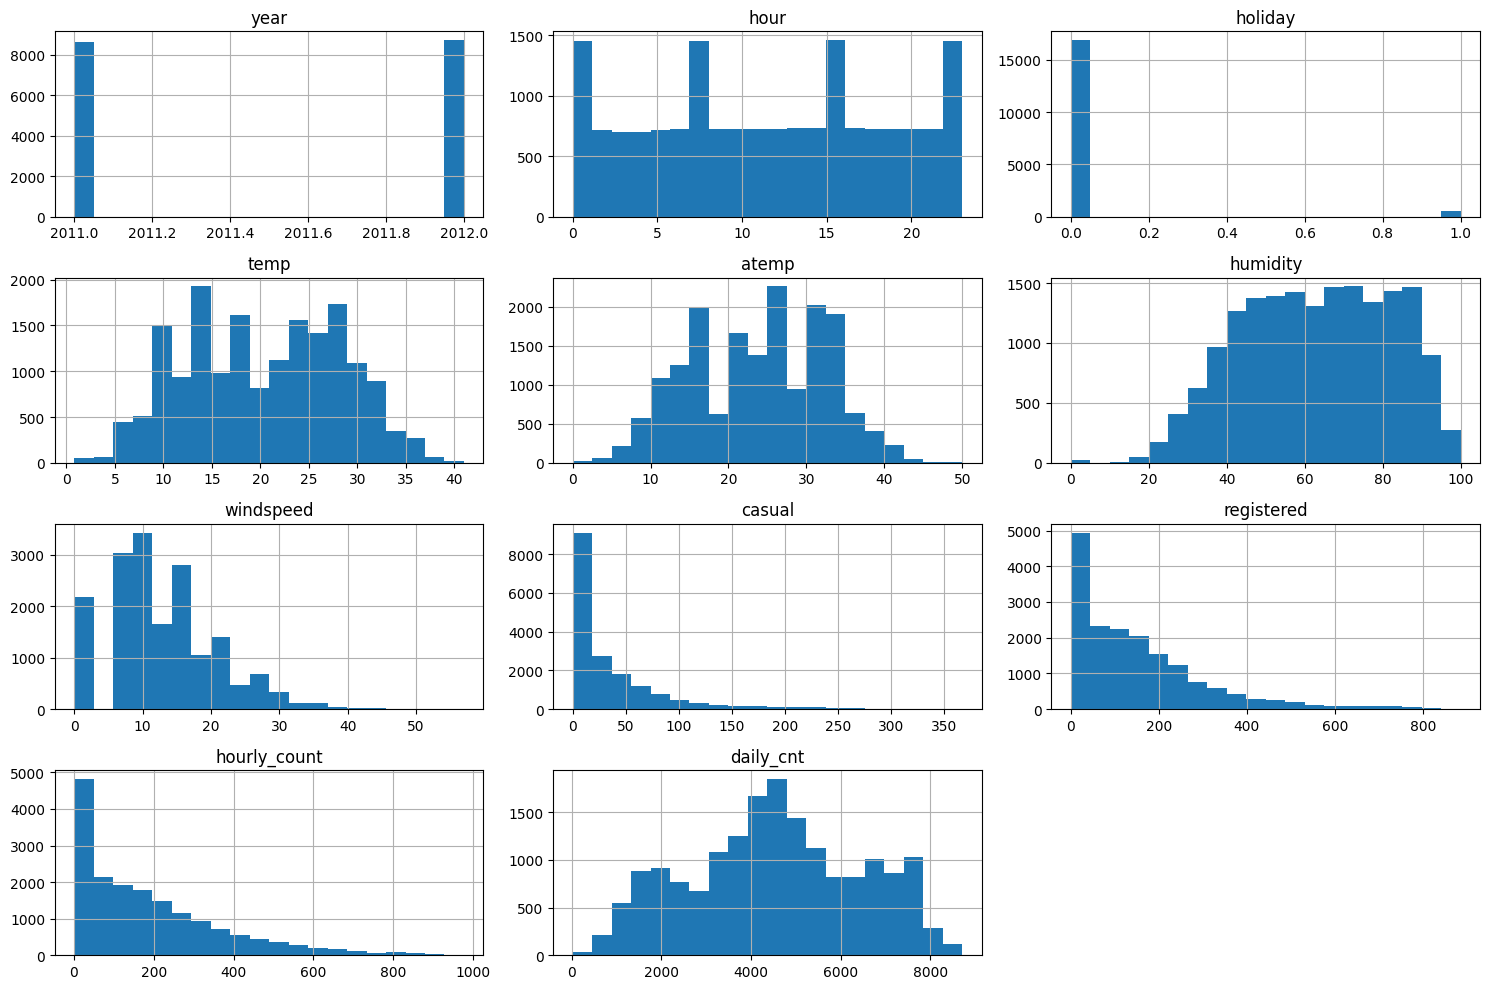

In [40]:
# EDA 1
print("Distribusi Variabel Numerik:")
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df[num_cols].hist(bins=20, figsize=(15,10))
plt.tight_layout()
plt.show()

In [41]:
# EDA 2
print("Distribusi Variabel Kategorikal:")
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in cat_cols:
    print(f"Distribusi untuk '{col}':")
    print(df[col].value_counts())
    print("-" * 40)

Distribusi Variabel Kategorikal:
Distribusi untuk 'season':
season
Fall      4496
Summer    4409
Spring    4242
Winter    4232
Name: count, dtype: int64
----------------------------------------
Distribusi untuk 'month':
month
Jul    1488
May    1488
Dec    1483
Aug    1475
Mar    1473
Oct    1451
Jun    1440
Apr    1437
Sep    1437
Nov    1437
Jan    1429
Feb    1341
Name: count, dtype: int64
----------------------------------------
Distribusi untuk 'weekday':
weekday
Saturday     2512
Sunday       2502
Friday       2487
Monday       2479
Wednesday    2475
Thursday     2471
Tuesday      2453
Name: count, dtype: int64
----------------------------------------
Distribusi untuk 'weather_category':
weather_category
Clear             11413
Misty              4544
Light_rainsnow     1419
Heavy_rainsnow        3
Name: count, dtype: int64
----------------------------------------
Distribusi untuk 'category_days':
category_days
weekdays    12365
weekend      5014
Name: count, dtype: int64
-------

In [42]:
# total rents per date
df_agg_date = df.groupby('dateday')['daily_cnt'].sum().reset_index()
print("Total penyewaan per tanggal:")
print(df_agg_date.head())

# total rents per month
df_agg_month = df.groupby('month')['daily_cnt'].sum().reset_index()
print("\nTotal penyewaan per bulan:")
print(df_agg_month.head())

Total penyewaan per tanggal:
     dateday  daily_cnt
0 2011-01-01      23640
1 2011-01-02      18423
2 2011-01-03      29678
3 2011-01-04      35926
4 2011-01-05      36800

Total penyewaan per bulan:
  month  daily_cnt
0   Apr    6444110
1   Aug    8391628
2   Dec    5058558
3   Feb    3582161
4   Jan    3184341


In [43]:
# in which hour the rent is the highest?
df_agg_hour = df.groupby('hour')['hourly_count'].mean().reset_index()
print("Rata-rata penyewaan sepeda per jam:")
print(df_agg_hour.head(24))  # show all hours (0-23)

Rata-rata penyewaan sepeda per jam:
    hour  hourly_count
0      0     53.898072
1      1     33.375691
2      2     22.869930
3      3     11.727403
4      4      6.352941
5      5     19.889819
6      6     76.044138
7      7    212.064649
8      8    359.011004
9      9    219.309491
10    10    173.668501
11    11    208.143054
12    12    253.315934
13    13    253.661180
14    14    240.949246
15    15    251.233196
16    16    311.983562
17    17    461.452055
18    18    425.510989
19    19    311.523352
20    20    226.030220
21    21    172.314560
22    22    131.335165
23    23     87.831044


In [44]:
# which season that most people rent bike?
df_agg_season = df.groupby('season')['hourly_count'].mean().reset_index()
print("Rata-rata penyewaan sepeda per jam berdasarkan musim:")
print(df_agg_season)

Rata-rata penyewaan sepeda per jam berdasarkan musim:
   season  hourly_count
0    Fall    236.016237
1  Spring    111.114569
2  Summer    208.344069
3  Winter    198.868856


In [45]:
# is there significant difference in the rent count of different temps?
# merged_df already have the temp value in Celsius
# make temp category
bins = [0, 10, 15, 20, 25, 30, 41]
labels = ['Sangat Dingin', 'Dingin', 'Sejuk', 'Hangat', 'Panas', 'Sangat Panas']
merged_df['temp_category'] = pd.cut(merged_df['temp'], bins=bins, labels=labels, include_lowest=True)

# check if the data has been categorized correctly
print(merged_df['temp_category'].value_counts())

# Agregation: count average of bike renting per hour based on the temp category
df_agg_temp = merged_df.groupby('temp_category')['hourly_count'].mean().reset_index()
print("Rata-rata penyewaan sepeda per jam berdasarkan kategori suhu:")
print(df_agg_temp)

temp_category
Panas            3720
Dingin           3428
Hangat           3215
Sejuk            2888
Sangat Panas     2115
Sangat Dingin    2013
Name: count, dtype: int64
Rata-rata penyewaan sepeda per jam berdasarkan kategori suhu:
   temp_category  hourly_count
0  Sangat Dingin     69.995529
1         Dingin    123.715286
2          Sejuk    168.441482
3         Hangat    209.508243
4          Panas    234.744624
5   Sangat Panas    328.323404


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25404\875171557.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agg_temp = merged_df.groupby('temp_category')['hourly_count'].mean().reset_index()


In [46]:
# are there more bike rents in weekday or weekend?
df_agg_days = df.groupby('category_days')['daily_cnt'].mean().reset_index()
print("Rata-rata penyewaan sepeda per hari untuk weekdays vs weekend:")
print(df_agg_days)

Rata-rata penyewaan sepeda per hari untuk weekdays vs weekend:
  category_days    daily_cnt
0      weekdays  4587.562232
1       weekend  4400.846231


**Insight:**

1. Struktur & Ringkasan Data
- Ukuran Dataset: 17.379 baris, 21 kolom (2011–2012).
- Tipe Data: Numerik (suhu, kelembapan, kecepatan angin, dll.), Kategorikal (musim, hari, kategori suhu), dan datetime (dateday).

2. Statistik Utama
- Suhu (°C): Rata-rata ~20, minimum ~0,8, maksimum 41.
- Kelembapan (%): Rata-rata ~63, maksimum 100.
- Pengguna: casual (rata-rata 36) dan registered (rata-rata 154).
- hourly_count: Rata-rata 189 sepeda/jam, max 977.

3. Distribusi Kategorikal
- season: Fall tertinggi (4496), lalu Summer, Spring, Winter.
- weather_category: Clear dominan (11413).
- category_days: weekdays (12365) vs weekend (5014).

4. Agregasi & Temuan
- Musim: Rata-rata penyewaan/jam paling tinggi di Fall (~236).
- Suhu: Kategori “Sangat Panas” mencapai ~328 penyewaan/jam, sedangkan “Sangat Dingin” ~70.
- Hari Kerja vs Weekend: weekdays (4588) sedikit lebih tinggi dibanding weekend (4401) untuk daily_cnt.

Kesimpulan:
- Musim gugur dan suhu hangat/panas meningkatkan permintaan.
- Hari kerja memiliki kontribusi besar, kemungkinan karena penggunaan sepeda untuk commuting.
- Data ini dapat menjadi acuan strategi penambahan armada, promosi, dan pengembangan layanan.

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana tren penyewaan sepeda berubah seiring waktu?

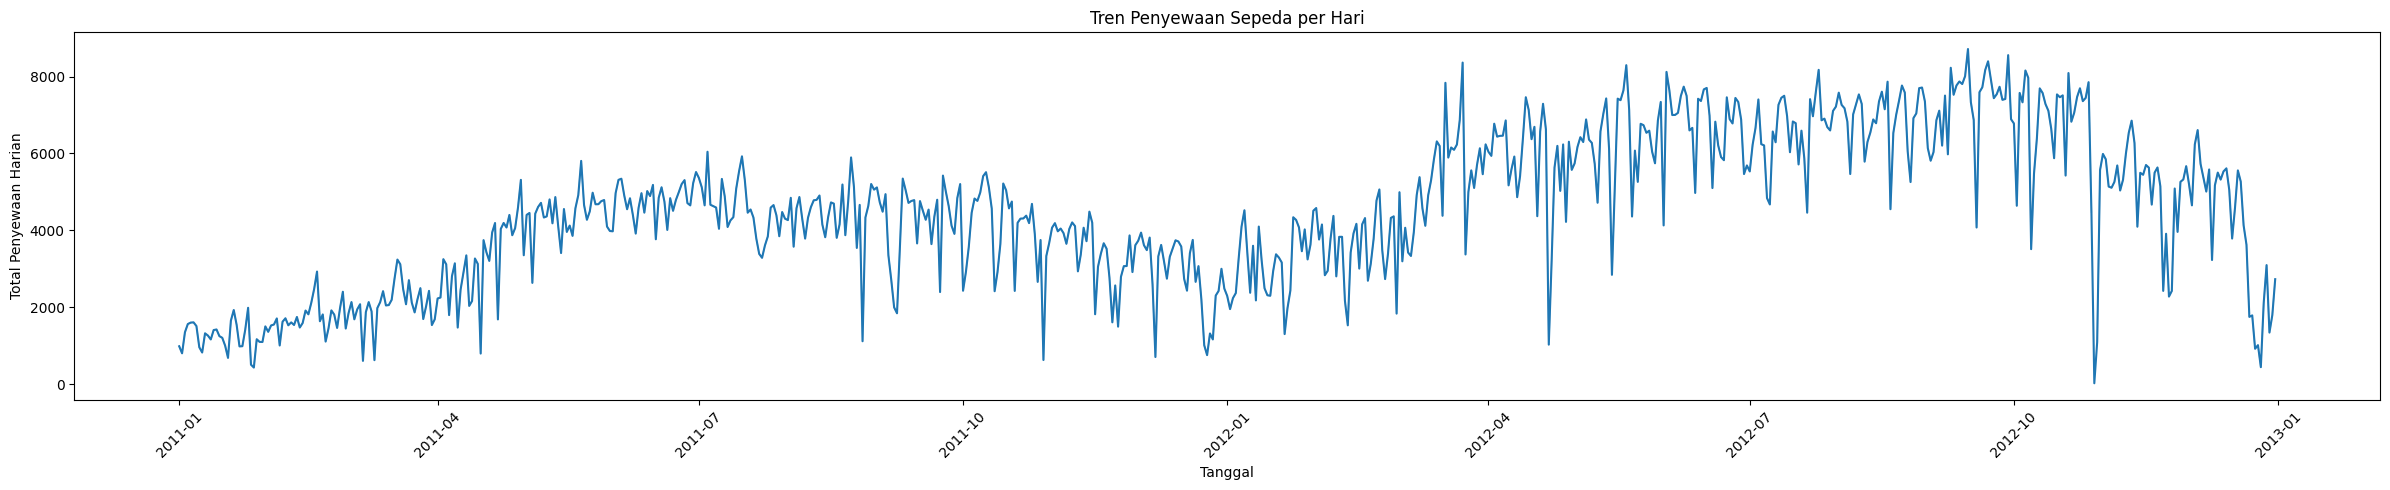

In [51]:
# total rents per day graph
date_col = 'dateday'  # Pastikan kolom ini ada di df

plt.figure(figsize=(24,5))
if date_col:
    sns.lineplot(data=df, x=date_col, y='daily_cnt')
    plt.title("Tren Penyewaan Sepeda per Hari")
    plt.xlabel("Tanggal")
    plt.ylabel("Total Penyewaan Harian")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Tidak dapat membuat plot karena kolom tanggal tidak ditemukan.")

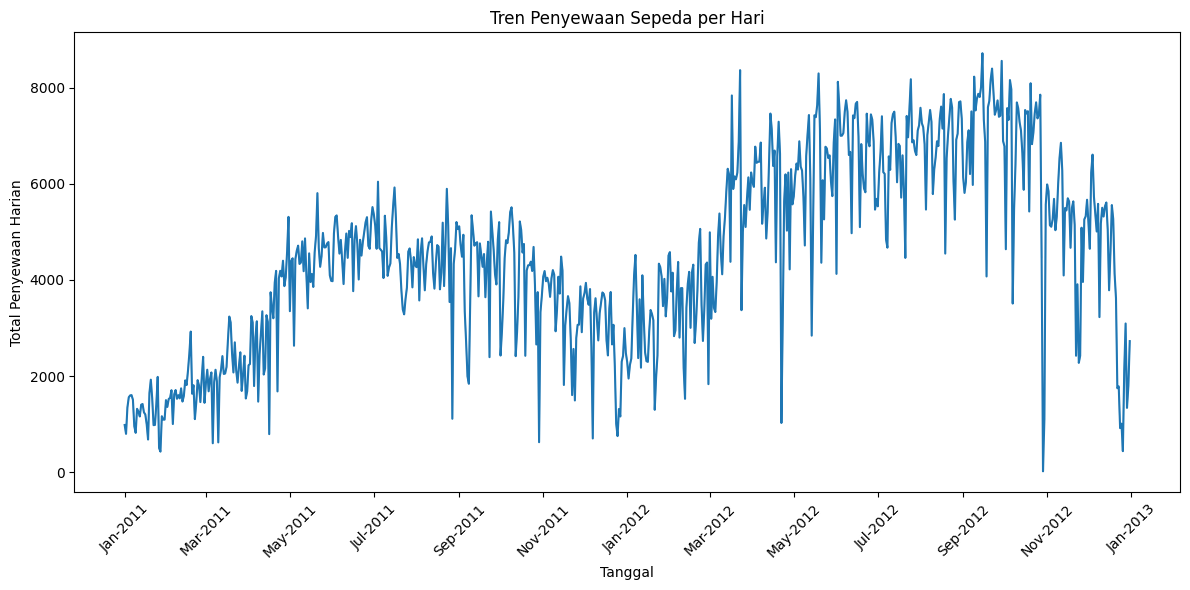

In [52]:
import matplotlib.dates as mdates

plt.figure(figsize=(12,6))

ax = sns.lineplot(data=df, x='dateday', y='daily_cnt')

# Menampilkan label sumbu x setiap 2 bulan
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))

# Memformat label tanggal menjadi 'Jan-2011'
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))

plt.title("Tren Penyewaan Sepeda per Hari")
plt.xlabel("Tanggal")
plt.ylabel("Total Penyewaan Harian")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

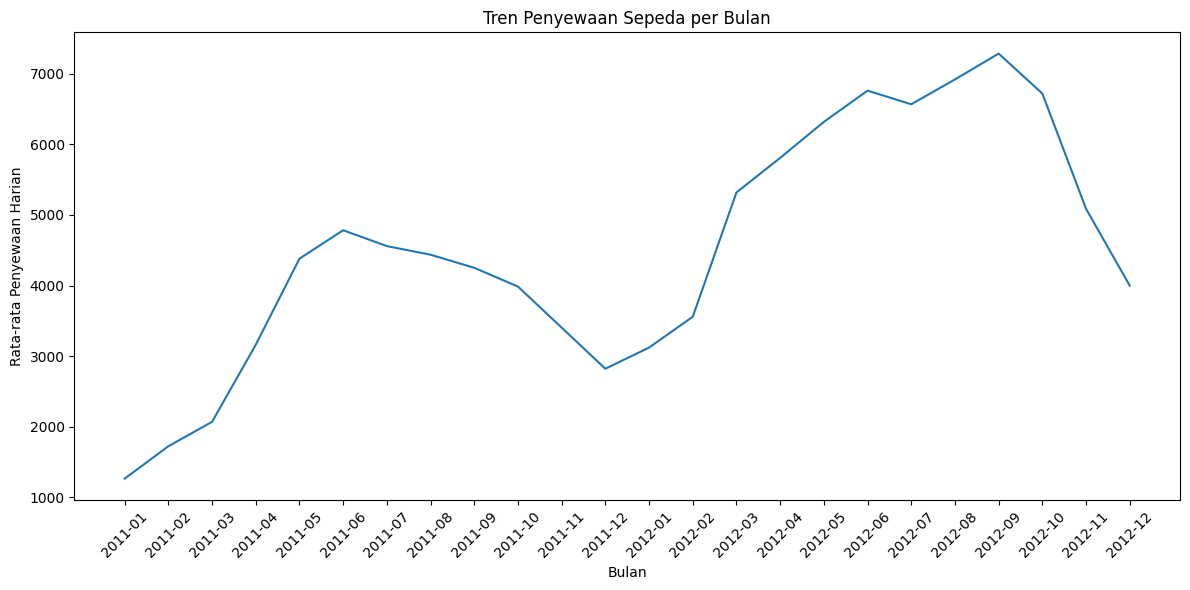

In [53]:
# make month year column
df['month_year'] = df[date_col].dt.to_period('M').astype(str)

# total daily_cnt per bulan
df_monthly = df.groupby('month_year', as_index=False)['daily_cnt'].mean()

plt.figure(figsize=(12,6))
sns.lineplot(data=df_monthly, x='month_year', y='daily_cnt')
plt.xticks(rotation=45)
plt.title("Tren Penyewaan Sepeda per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Rata-rata Penyewaan Harian")
plt.tight_layout()
plt.show()

### Pertanyaan 2:
Bagaimana pengaruh faktor waktu (jam) terhadap penyewaan?

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25404\2670368122.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hourly_avg, x='hour', y='hourly_count', palette='viridis')


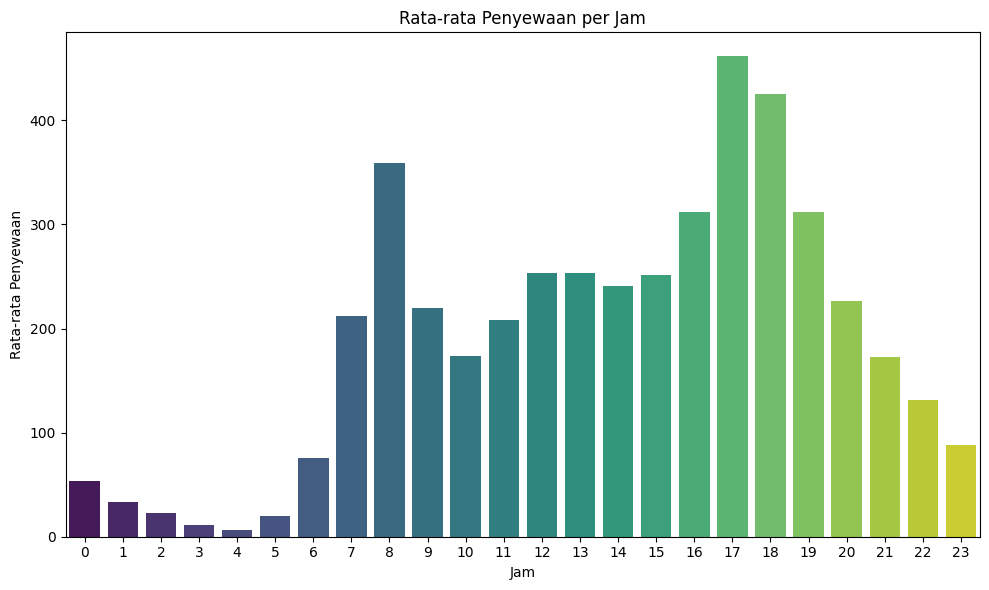

In [54]:
# average rents per hour
plt.figure(figsize=(10,6))
# Menghitung rata-rata penyewaan per jam
hourly_avg = df.groupby('hour')['hourly_count'].mean().reset_index()
sns.barplot(data=hourly_avg, x='hour', y='hourly_count', palette='viridis')
plt.title("Rata-rata Penyewaan per Jam")
plt.xlabel("Jam")
plt.ylabel("Rata-rata Penyewaan")
plt.tight_layout()
plt.show()

### Pertanyaan 3:
Bagaimana pengaruh kondisi musim terhadap penyewaan?

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25404\158672189.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_avg, x='season', y='hourly_count', palette='coolwarm')


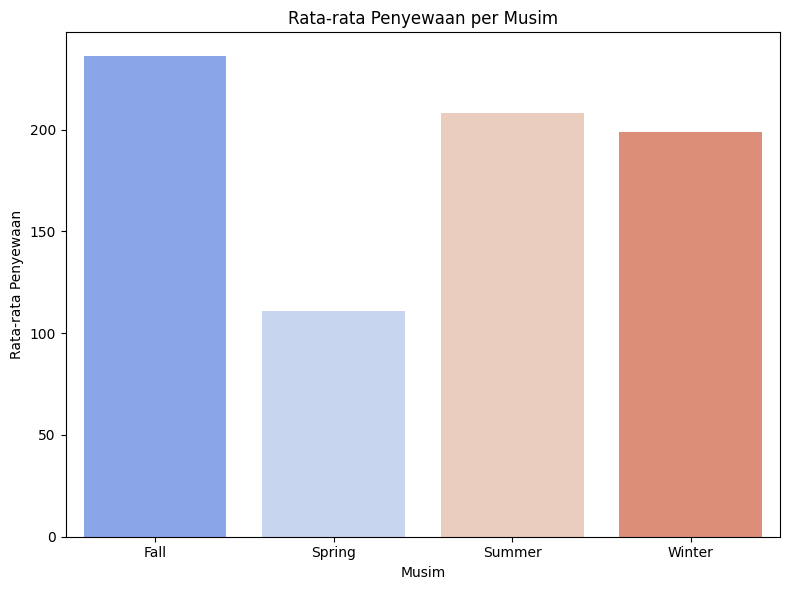

In [55]:
# how season affects rent
plt.figure(figsize=(8,6))
season_avg = df.groupby('season')['hourly_count'].mean().reset_index()
sns.barplot(data=season_avg, x='season', y='hourly_count', palette='coolwarm')
plt.title("Rata-rata Penyewaan per Musim")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Penyewaan")
plt.tight_layout()
plt.show()

### Pertanyaan 4:
Bagaimana pengaruh suhu terhadap penyewaan?

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25404\763788347.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_agg_temp, x='temp_category', y='hourly_count', palette='magma')


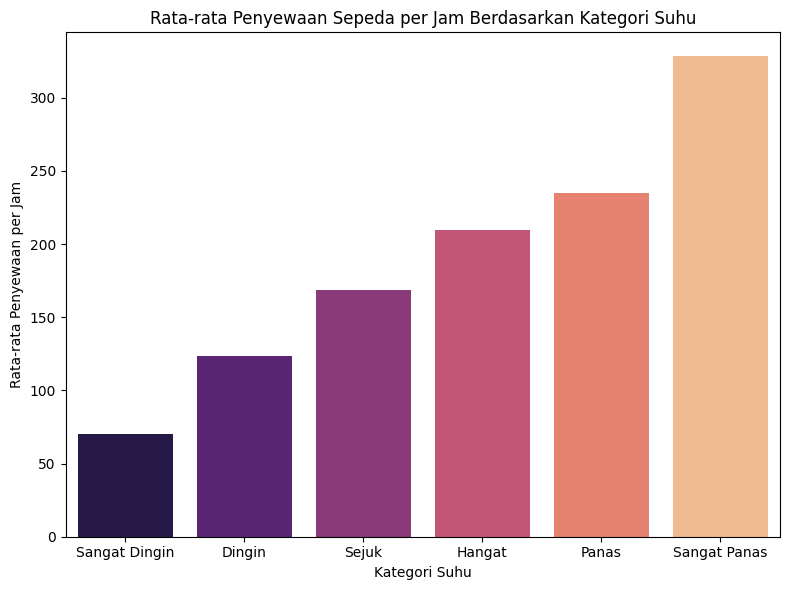

In [56]:
# temperature & rent relationship
plt.figure(figsize=(8,6))
sns.barplot(data=df_agg_temp, x='temp_category', y='hourly_count', palette='magma')
plt.title("Rata-rata Penyewaan Sepeda per Jam Berdasarkan Kategori Suhu")
plt.xlabel("Kategori Suhu")
plt.ylabel("Rata-rata Penyewaan per Jam")
plt.tight_layout()
plt.show()

### Pertanyaan 5:
Apakah terdapat perbedaan pola penyewaan antara weekdays dan weekend?

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25404\843515264.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='category_days', y='daily_cnt', palette='pastel')


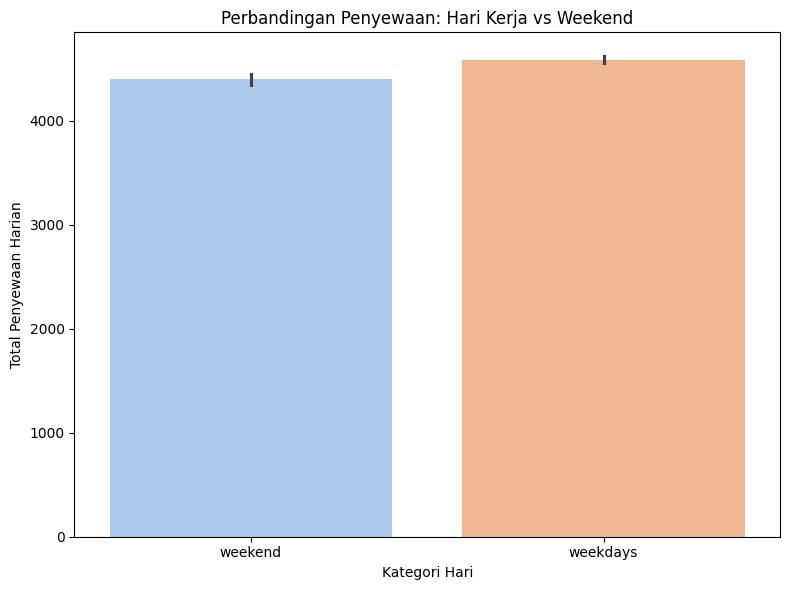

In [57]:
# how different is the rent pattern in weekday vs weekend?
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='category_days', y='daily_cnt', palette='pastel')
plt.title("Perbandingan Penyewaan: Hari Kerja vs Weekend")
plt.xlabel("Kategori Hari")
plt.ylabel("Total Penyewaan Harian")
plt.tight_layout()
plt.show()

**Insight:**

1. **Tren Penyewaan Sepeda per Hari**  
   - Dari grafik line plot, jumlah penyewaan harian cenderung meningkat di pertengahan tahun dan menurun menjelang akhir tahun. Terlihat adanya pola musiman, di mana musim tertentu memengaruhi lonjakan permintaan.

2. **Rata-rata Penyewaan per Jam**  
   - Bar chart menunjukkan adanya puncak penyewaan pada pagi hari (sekitar jam 7–9) dan sore hari (sekitar jam 17–19). Hal ini menandakan aktivitas bersepeda tinggi di jam sibuk (commuting hours).

3. **Rata-rata Penyewaan per Musim**  
   - Grafik memperlihatkan **Fall** memiliki rata-rata penyewaan tertinggi, diikuti Summer, Winter, dan terakhir Spring. Ini mengindikasikan cuaca pada musim gugur dan musim panas lebih mendukung atau lebih diminati pengguna.

4. **Rata-rata Penyewaan Sepeda per Jam Berdasarkan Kategori Suhu**  
   - Semakin tinggi suhu, semakin tinggi pula rata-rata penyewaan. Kategori “Sangat Panas” menempati posisi tertinggi, sedangkan “Sangat Dingin” terendah. Ini menegaskan bahwa kondisi cuaca hangat hingga panas cenderung meningkatkan minat pengguna.

5. **Perbandingan Penyewaan: Hari Kerja vs Weekend**  
   - Weekend sedikit lebih tinggi dibanding weekdays. Hal ini wajar karena banyak orang memiliki waktu luang lebih banyak pada akhir pekan untuk kegiatan rekreasi atau olahraga.

# --- Analisis Lanjutan: Clustering (Manual Grouping) ---

## Analisis Lanjutan: Clustering Hari Berdasarkan Total Penyewaan Harian

Pada bagian ini, kita mengelompokkan hari berdasarkan total penyewaan harian (*daily_cnt*) ke dalam tiga kategori:
- **Low Usage:** Hari dengan penyewaan di bawah 3000
- **Medium Usage:** Hari dengan penyewaan antara 3000 hingga 5000
- **High Usage:** Hari dengan penyewaan di atas 5000

Tujuannya adalah untuk mengidentifikasi hari-hari dengan performa tinggi dan rendah, sehingga dapat dijadikan dasar pengambilan keputusan dalam hal penambahan armada atau promosi khusus.

### Hasil Analisis
- Distribusi hari dalam masing-masing kategori ditampilkan pada grafik count plot.
- Insight yang diperoleh: (contoh) Jika terdapat banyak hari dengan kategori 'High Usage', maka sebaiknya operator menyiapkan armada tambahan atau melakukan perawatan ekstra pada hari-hari tersebut.
  
### Rekomendasi
- Jika kategori 'Low Usage' mendominasi, pertimbangkan strategi promosi untuk meningkatkan penggunaan di hari tersebut.
- Jika 'High Usage' tersebar tidak merata, analisis lebih lanjut dapat dilakukan untuk mengetahui faktor pemicu penggunaan tinggi pada hari-hari tersebut.

Distribusi kategori penggunaan harian:
usage_category
High Usage      6861
Medium Usage    6535
Low Usage       3983
Name: count, dtype: int64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25404\1626981241.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='usage_category', palette='Set2')


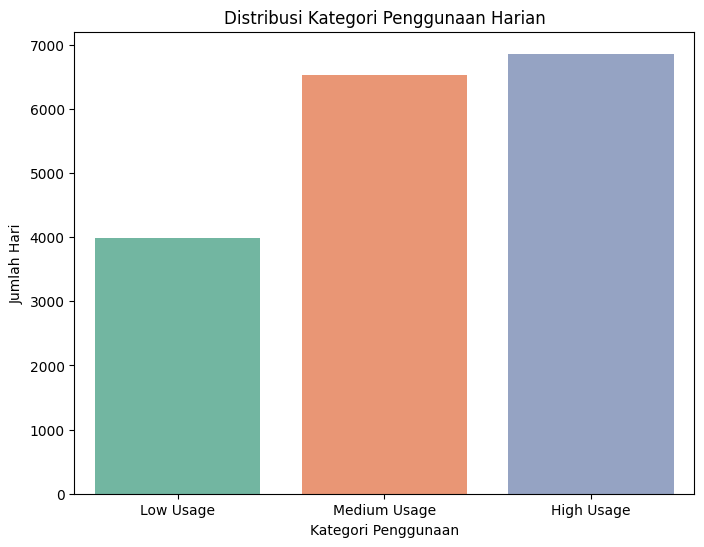

In [58]:
# Mengelompokkan hari berdasarkan total penyewaan (daily_cnt)
bins_usage = [0, 3000, 5000, df['daily_cnt'].max()]
labels_usage = ['Low Usage', 'Medium Usage', 'High Usage']
df['usage_category'] = pd.cut(df['daily_cnt'], bins=bins_usage, labels=labels_usage, include_lowest=True)

# Tampilkan distribusi kategori penggunaan
print("Distribusi kategori penggunaan harian:")
print(df['usage_category'].value_counts())

# Visualisasikan distribusi kategori penggunaan
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.countplot(data=df, x='usage_category', palette='Set2')
plt.title("Distribusi Kategori Penggunaan Harian")
plt.xlabel("Kategori Penggunaan")
plt.ylabel("Jumlah Hari")
plt.show()

## Conclusion

### Kesimpulan

1. **Tren Penyewaan Sepeda Harian**  
   - Berdasarkan line plot harian (*daily_cnt*), terlihat adanya peningkatan jumlah penyewaan pada pertengahan tahun, diikuti penurunan di akhir tahun. Hal ini mengindikasikan adanya pengaruh cuaca atau musim tertentu yang mendorong lebih banyak orang untuk bersepeda.  
   - Selain itu, fluktuasi mingguan juga dapat terjadi karena pengaruh akhir pekan, hari libur, dan agenda khusus (misalnya event lokal).

2. **Pengaruh Waktu (Jam) Terhadap Penyewaan**  
   - Rata-rata penyewaan per jam (*hourly_count*) memperlihatkan dua puncak signifikan: pagi (sekitar pukul 7–9) dan sore (sekitar pukul 17–19). Pola ini sejalan dengan jam berangkat kerja atau pulang kantor (commuting hours).  
   - Di luar jam sibuk, penyewaan cenderung lebih rendah, menandakan adanya peluang untuk mengisi kekosongan tersebut dengan strategi promosi atau paket khusus.

3. **Perbedaan Penyewaan Berdasarkan Musim**  
   - Hasil *bar plot* menunjukkan **Fall** memiliki rata-rata penyewaan tertinggi, disusul Summer, Winter, dan terakhir Spring. Ini bisa dipengaruhi oleh kondisi cuaca yang nyaman pada musim gugur (misalnya tidak terlalu panas, tidak terlalu dingin), serta aktivitas masyarakat yang meningkat.  
   - Namun, Winter pun tetap menunjukkan angka penyewaan yang lumayan, menandakan sebagian pengguna tetap bersepeda meski suhu lebih rendah.

4. **Korelasi Suhu dengan Penyewaan Sepeda**  
   - Visualisasi menunjukkan bahwa kategori suhu yang lebih tinggi berkorelasi dengan peningkatan rata-rata penyewaan. Kategori “Sangat Panas” justru menduduki posisi teratas, sementara “Sangat Dingin” terendah.  
   - Faktor ini menegaskan pentingnya memperhatikan kondisi cuaca untuk perencanaan operasional. Meskipun “Sangat Panas” lebih diminati, operator tetap perlu memastikan ketersediaan sarana pendukung seperti hidrasi atau titik istirahat.

5. **Perbandingan Weekdays vs Weekend**  
   - Penyewaan pada akhir pekan (weekend) sedikit lebih tinggi dibanding hari kerja (weekdays). Orang cenderung memiliki lebih banyak waktu luang di akhir pekan, sehingga bersepeda menjadi salah satu pilihan aktivitas rekreasi.  
   - Bagi penyedia layanan, data ini menunjukkan potensi pasar rekreasi dan keluarga pada Sabtu–Minggu, yang bisa dikembangkan melalui penawaran paket atau event khusus akhir pekan.

### Rekomendasi Strategis

1. **Penyesuaian Armada dan Jadwal Operasional**  
   - Tambahkan sepeda atau buka lebih banyak titik sewa pada jam sibuk (pagi dan sore hari) serta pada musim dengan permintaan tinggi (Fall dan Summer).  
   - Pertimbangkan sistem reservasi atau pemesanan online untuk mencegah antrian panjang di jam puncak.

2. **Program Promosi di Musim Dingin**  
   - Untuk menjaga kestabilan penyewaan saat suhu lebih dingin, pertimbangkan diskon atau bundling dengan minuman hangat/coffee shop di sekitar area penyewaan.  
   - Kampanye “Winter Ride Challenge” dapat memacu semangat pengguna setia.

3. **Pengembangan Layanan Akhir Pekan**  
   - Manfaatkan tingginya antusiasme di akhir pekan dengan membuat paket keluarga, tur sepeda wisata, atau diskon khusus weekend.  
   - Kolaborasi dengan event olahraga atau festival setempat untuk memaksimalkan potensi pasar rekreasi.

4. **Analisis Lanjutan**  
   - Gunakan model prediksi untuk memperkirakan permintaan berdasarkan cuaca, musim, dan jam tertentu.  
   - Perluas data dengan faktor cuaca lain (kelembapan, curah hujan, polusi udara) guna mendapatkan insight yang lebih komprehensif.

Secara keseluruhan, data menunjukkan bahwa **waktu (jam), musim, suhu, dan jenis hari (weekdays vs weekend)** adalah variabel-variabel kunci yang memengaruhi tingkat penyewaan sepeda. Dengan memanfaatkan insight ini, pengelola dapat merancang strategi operasional, pemasaran, dan pengembangan layanan yang lebih tepat sasaran.

- RFM Analysis: Tidak diterapkan karena data transaksi per pelanggan tidak tersedia.
- Geospatial Analysis: Tidak diterapkan karena tidak ada data lokasi.
- Clustering: Menggunakan teknik binning untuk mengelompokkan hari berdasarkan total penyewaan.